# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [310]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT_ADSP/Project1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [315]:
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 1898 rows and 9 columns.


#### Observations:
**There are 1898 rows and 9 columns.**

---
\

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
**There are four colums with integer (int64) as datatype, four columns with object as datatype, and one as float (float64) as datatype. Also, no value is missig, as all comumns are non-null.**

---
\

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [322]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
**No value is missing. Thus no treatment needed here.**

---
\

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [342]:
# For type as object
df.describe(include=['category','object'])


,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


In [343]:
# df.describe()

# For type as interger or float, but decicded to avoid order_id and customer_id from this list
df[['cost_of_the_order','food_preparation_time','delivery_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


In [301]:
# df.food_preparation_time.min()
print(f"The minimum time it takes for food to be prepared once an order is placed is {df.food_preparation_time.min():.2f} minutes.")

# df.food_preparation_time.mean()
print(f"The average time it takes for food to be prepared once an order is placed is {df.food_preparation_time.mean():.2f} minutes.")

# df.food_preparation_time.max()
print(f"The maximum time it takes for food to be prepared once an order is placed is {df.food_preparation_time.max():.2f} minutes.")

The minimum time it takes for food to be prepared once an order is placed is 20.00 minutes.
The average time it takes for food to be prepared once an order is placed is 27.37 minutes.
The maximum time it takes for food to be prepared once an order is placed is 35.00 minutes.


#### Observations:
**The minimum, average, and maximum time it takes for food to be prepared once an order is placed is: 20 mins, 27.37 mins and 35 minutes respectively.**

---
\

### **Question 5:** How many orders are not rated? [1 mark]

In [294]:
null_rated_order = df.rating.isnull().sum() # Though we saw this is ans1, I thought to reprint it here.
print(f"There are {null_rated_order} orders with no data. \n")

# Get the list of all mentioned rating values
various_ratings = df['rating'].unique()
print(f"The various available ratings are {various_ratings}. \n")

# Get the count of various ratings
count_ratings = df['rating'].value_counts(dropna=False)
# print(f"The count of various ratings are {count_ratings}. \n")

print(f"There are total {count_ratings.iloc[0]} orders which are not rated by customers.")

There are 0 orders with no data. 

The various available ratings are ['Not given' '5' '3' '4']. 

There are total 736 orders which are not rated by customers.


#### Observations:
**There are total 736 orders which are not rated by customers.**

---
\

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

###### order_id

In [41]:
null_order_id = df.order_id.isnull().sum()
print(f"There are {null_order_id} null values in order_id. \n")

unique_order_id = len(df['order_id'].unique())
print(f"There are {unique_order_id} unique values in order_id.")

There are 0 null values in order_id. 

There are 1898 unique values in order_id.


#### Observations:
All orders have ID and none is repeated, thus order ID related data is correct (As no two orders can have same oder_ids).

---
\

###### customer_id

In [55]:
# df['customer_id'].notnull().sum()
null_customer_id = df.customer_id.isnull().sum()
print(f"There are {null_customer_id} null values in customer_id.")

unique_customer_id = len(df['customer_id'].unique())
print(f"\nThere are {unique_customer_id} unique values in customers (customer_id).")

max_repeated_customer_id = df['customer_id'].value_counts().idxmax()
max_repeated_customer_id_count = df['customer_id'].value_counts().max()

print(f"\nThe customer with customer_id {max_repeated_customer_id} ordered food {max_repeated_customer_id_count} times.")

There are 0 null values in customer_id.

There are 1200 unique values in customers (customer_id).

The customer with customer_id 52832 ordered food 13 times.


#### Observations:
There are 1200 unique customers and cusotmer with ID 52832 has order food maximum time, i.e. 13 times.

---
\

###### restaurant_name

In [52]:
total_listed_resturants = df['restaurant_name'].unique().size
print(f"There are {total_listed_resturants} listed resturants.")

value_counts = df['restaurant_name'].value_counts()

max_count_restaurant_name = df['restaurant_name'].value_counts().idxmax()
max_count = df['restaurant_name'].value_counts().max()

print(f"\nRestaurant {max_count_restaurant_name} received maximum numbers of orders, i.e. {max_count} in total orders.")


There are 178 listed resturants.

Restaurant Shake Shack received maximum numbers of orders, i.e. 219 in total orders.


In [382]:
# # Calculate value counts for the restaurant names
# value_counts = df['restaurant_name'].value_counts()

# # Find the minimum count of orders
# min_count = value_counts.min()

# # Find all restaurant names with the minimum count
# min_count_restaurant_names = value_counts[value_counts == min_count].index.tolist()

# # Print the result with each restaurant name on a new line
# print(f"The following restaurants received the minimum number of orders, i.e. {min_count} in total orders:")
# for restaurant in min_count_restaurant_names:
#     print(restaurant)

The following restaurants received the minimum number of orders, i.e. 1 in total orders:
Le Zie 2000 Trattoria
Cafe de La Esquina
Sarabeth's West
Frank Restaurant
Hiroko's Place
Rye House
Lamarca Pasta
67 Burger
Lucky Strike
Paul & Jimmy's
Hampton Chutney Co.
Wa Jeal
Hunan Manor
Moonstruck on Second
Il Bambino
Nha Trang One
Market Table
Emporio
Galli Restaurant
Coppola's East
Kori Restaurant and Bar
Woorijip
Crema Restaurante
The MasalaWala
Anjappar Chettinad
Big Wong Restaurant _¤¾Ñ¼
Klong
Haru Gramercy Park
Chote Nawab
Pepe Giallo
Taro Sushi
Samurai Mama
Hibino
Balade
Posto
Kambi Ramen House
Wo Hop Restaurant
Spice Thai
Gaia Italian Cafe
Chola Eclectic Indian Cuisine
Rohm Thai
Dig Inn Seasonal Market
Socarrat Paella Bar
Alidoro
Cipriani Le Specialita
Sushi Choshi
Dos Caminos Soho
La Follia
Philippe Chow
'wichcraft


#### Observations:
- There are 178 listed resturants.
- Restaurant Shake Shack received maximum numbers of orders, i.e. 219 in total orders.


---
\

###### cuisine_type

There are 0 null values in cuisine_type.

14 unique types of cuisine are listed.

The cuisine American received maximum numbers of orders, i.e. 584 in total orders.



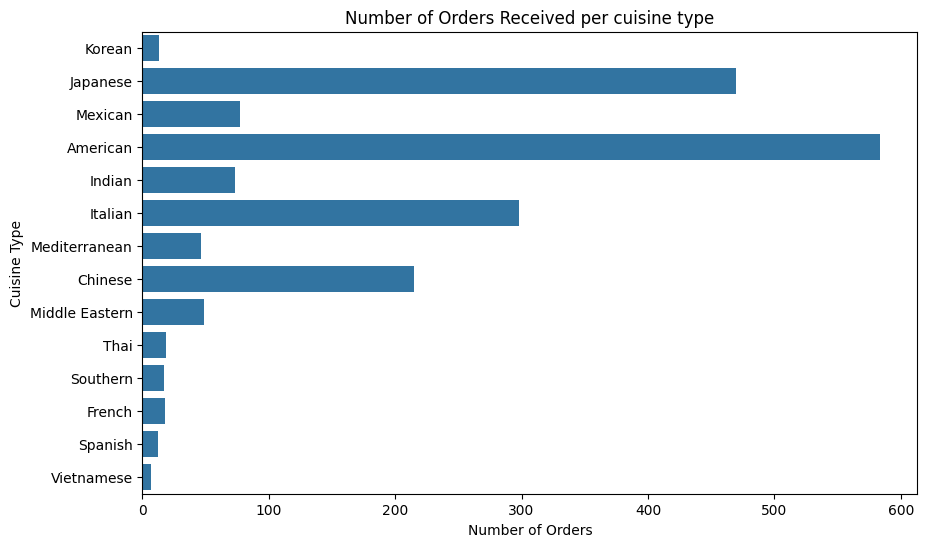

In [60]:
null_cuisine_type = df.cuisine_type.isnull().sum()
print(f"There are {null_cuisine_type} null values in cuisine_type.")

unique_cuisine_type = len(df['cuisine_type'].unique())
print(f"\n{unique_cuisine_type} unique types of cuisine are listed.")

max_repeated_cuisine_type = df['cuisine_type'].value_counts().idxmax()
max_repeated_cuisine_type_count = df['cuisine_type'].value_counts().max()
print(f"\nThe cuisine {max_repeated_cuisine_type} received maximum numbers of orders, i.e. {max_repeated_cuisine_type_count} in total orders.\n")

plt.figure(figsize=(10, 6))
sns.countplot(y='cuisine_type', data=df)
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.title('Number of Orders Received per cuisine type')
plt.show()



#### Observations:
- 14 unique types of cuisine are listed.

- The cuisine American received maximum numbers of orders, i.e. 584 in total orders.


\

###### cost_of_the_order

The maximum numbers of orders i.e. 86 are costing $12.18 in total.



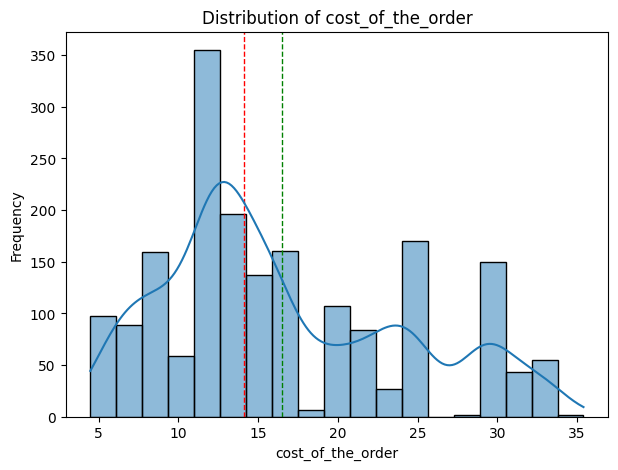

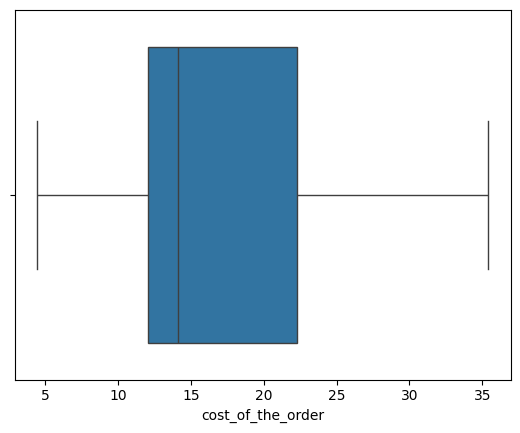

In [385]:
max_repeated_cost = df['cost_of_the_order'].value_counts().idxmax()
max_repeated_cost_count = df['cost_of_the_order'].value_counts().max()
print(f"The maximum numbers of orders i.e. {max_repeated_cost_count} are costing ${max_repeated_cost} in total.\n")

plt.figure(figsize = (7,5))
plt.axvline(df['cost_of_the_order'].mean(), color='g', linewidth=1, linestyle='dashed')
plt.axvline(df['cost_of_the_order'].median(), color='r', linewidth=1, linestyle='dashed')
plt.title('Distribution of cost_of_the_order')
plt.xlabel('cost_of_the_order')
plt.ylabel('Frequency')
sns.histplot(data = df, x = 'cost_of_the_order', kde = True)
plt.show()

sns.boxplot(data = df, x = 'cost_of_the_order')
plt.show()

#### Observations:
The maximum numbers of orders i.e. 86 are costing $12.18 in total.

\

###### day_of_the_week


Total number of orders received on weekend are 1351 and on weekdays are 547.


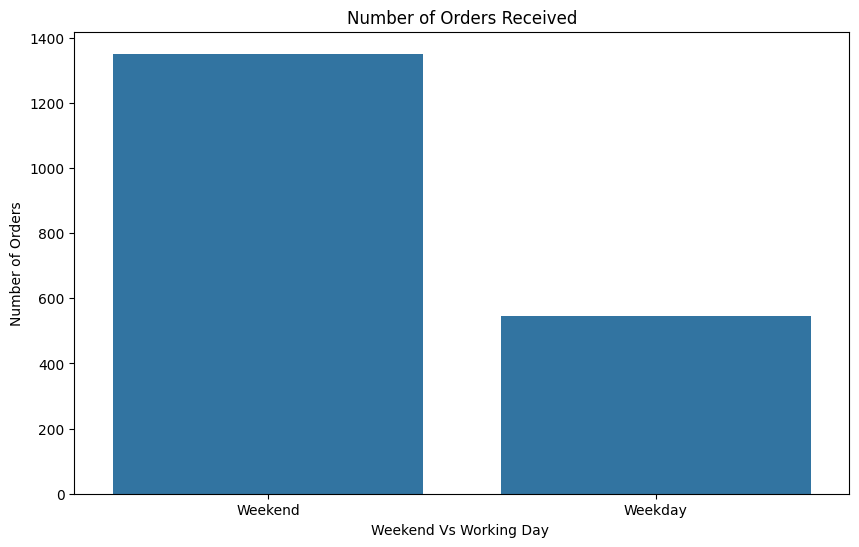

In [118]:
day_type_count = df['day_of_the_week'].value_counts()
print(f"\nTotal number of orders received on weekend are {day_type_count.get('Weekend', 0)} and on weekdays are {day_type_count.get('Weekday', 0)}.")

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_the_week', data=df)
plt.xlabel('Weekend Vs Working Day ')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Received')
plt.show()

#### Observations:

Total number of orders received on weekend are 1351 and on weekdays are 547.

\

###### rating

There are ['Not given' '5' '3' '4'] unique values for ratings.

There are 0 null values in rating.


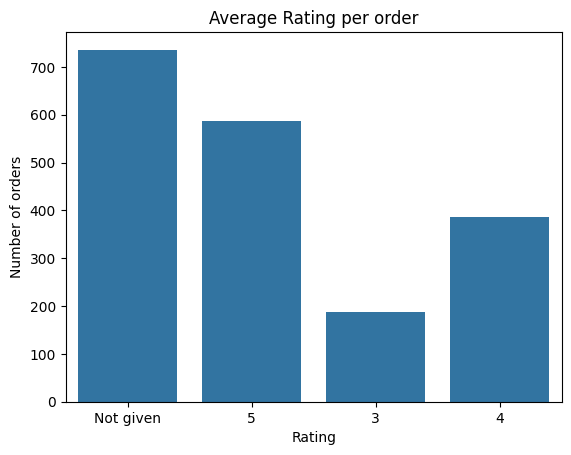

In [122]:
unique_rating = df['rating'].unique()
print(f"There are {unique_rating} unique values for ratings.")

null_rating = df.rating.isnull().sum()
print(f"\nThere are {null_rating} null values in rating.")

sns.countplot(data = df, x = 'rating')
plt.xlabel('Rating')
plt.ylabel('Number of orders')
plt.title('Average Rating per order')
plt.show()

#### Observations:
- There is no order with NULL rating.
- There are ['Not given' '5' '3' '4'] unique values for ratings.
- Maximum orders are not rated.

\

###### Food Preparation time

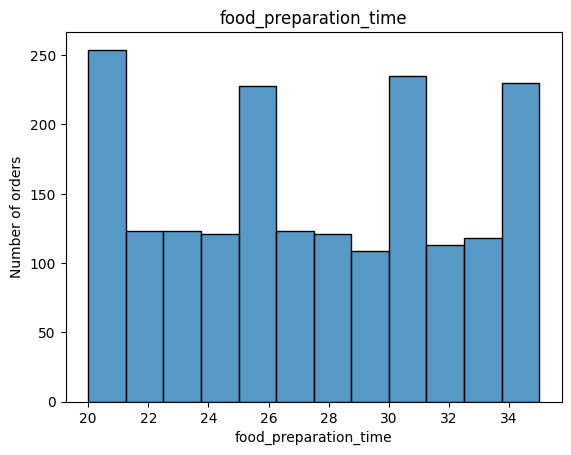

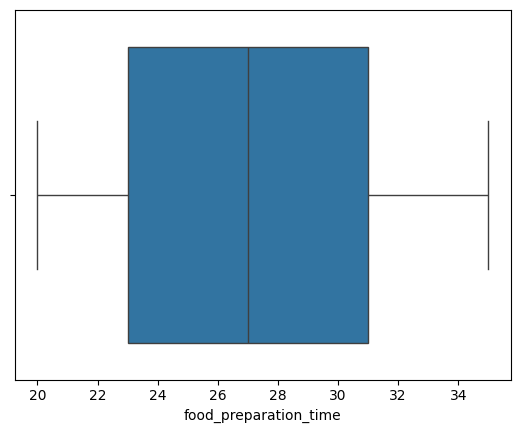

In [ ]:
sns.histplot(data=df,x='food_preparation_time')
plt.xlabel('food_preparation_time')
plt.ylabel('Number of orders')
plt.title('food_preparation_time')

plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:

- Minimum food preparation time is around 20 mins.
- Maximum food preparation time is around 35 mins.
- Median food preparation time is around 27 mins.
\

delivery_time

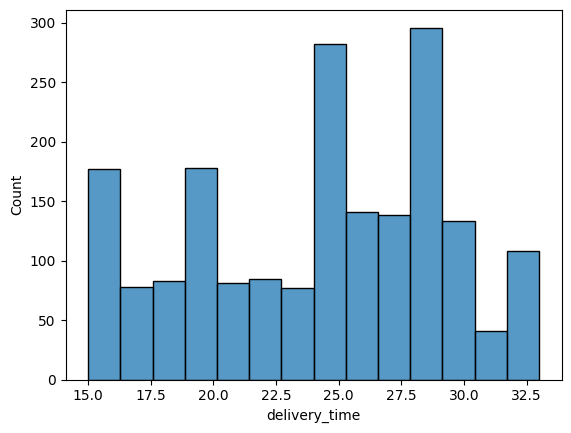

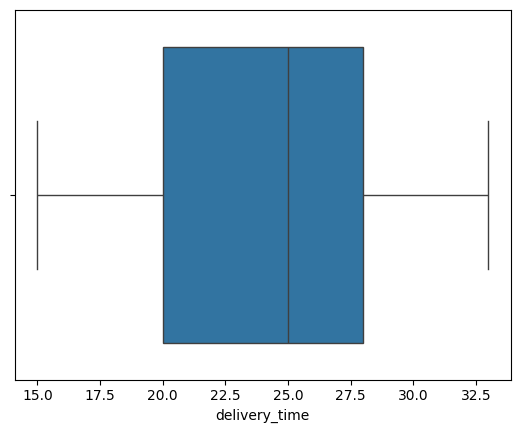

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show()

sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:

- Minimum delivery time is 15 mins
- Maximum delievr time is around 33 mins
- Median delievery time is 25 mins

\

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [293]:
top_five_resturants = df['restaurant_name'].value_counts().head()
print(top_five_resturants)
# Bt default, head() gives top 5 values, if say top 6 are needed, then we have to use head(6)

# Get the print the list of top five returants
top_five_resturants = df['restaurant_name'].value_counts().head(5).index.tolist()
print(f"\nThe top 5 returants with maximum orders are: {', '.join(top_five_resturants)}.")


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

The top 5 returants with maximum orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.


#### Observations:
**The top 5 restaurants in terms of the number of orders received are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.**

---
\

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [292]:
popular_weekend_cuisine = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = popular_weekend_cuisine['cuisine_type'].value_counts().idxmax()
print(f"The most popular cuisine on weekends is {most_popular_cuisine}.")


The most popular cuisine on weekends is American.


#### Observations:
**The most popular cuisine on weekends is American.**

---
\

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [291]:
df_greater_than_20 = df[df['cost_of_the_order']>20]
percentage_greater_than_20 = (len(df_greater_than_20)/len(df))*100
print(f"The percentage of orders costing more than 20 dollars is {percentage_greater_than_20:.2f}%.")

The percentage of orders costing more than 20 dollars is 29.24%.


#### Observations:
**The percentage of orders costing more than 20 dollars is 29.24%.**

---
\

### **Question 10**: What is the mean order delivery time? [1 mark]

In [287]:
mean_delivery_time = df.delivery_time.mean()
print(f"The mean delivery time is {mean_delivery_time:.2f} minutes.")

The mean delivery time is 24.16 minutes.


#### Observations:
**The mean delivery time is 24.16 minutes.**

---

\

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [286]:
# df['customer_id'].value_counts().sort_values(ascending = False).head(3)
# top_3_customers = df['customer_id'].value_counts().head(3)
# print(top_3_customers)

# Get and print the top 3 frerquent customers_ids
top_3_customers = df['customer_id'].value_counts().head(3).index.tolist()
print(f"The top 3 most frequent customers have customer_ids as: {top_3_customers[0]}, {top_3_customers[1]}, and {top_3_customers[2]}.")


The top 3 most frequent customers have customer_ids as: 52832, 47440, and 83287.


#### Observations:
**The top 3 most frequent customers have customer_ids as: 52832, 47440, and 83287.**

---
\

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Food Preparation time

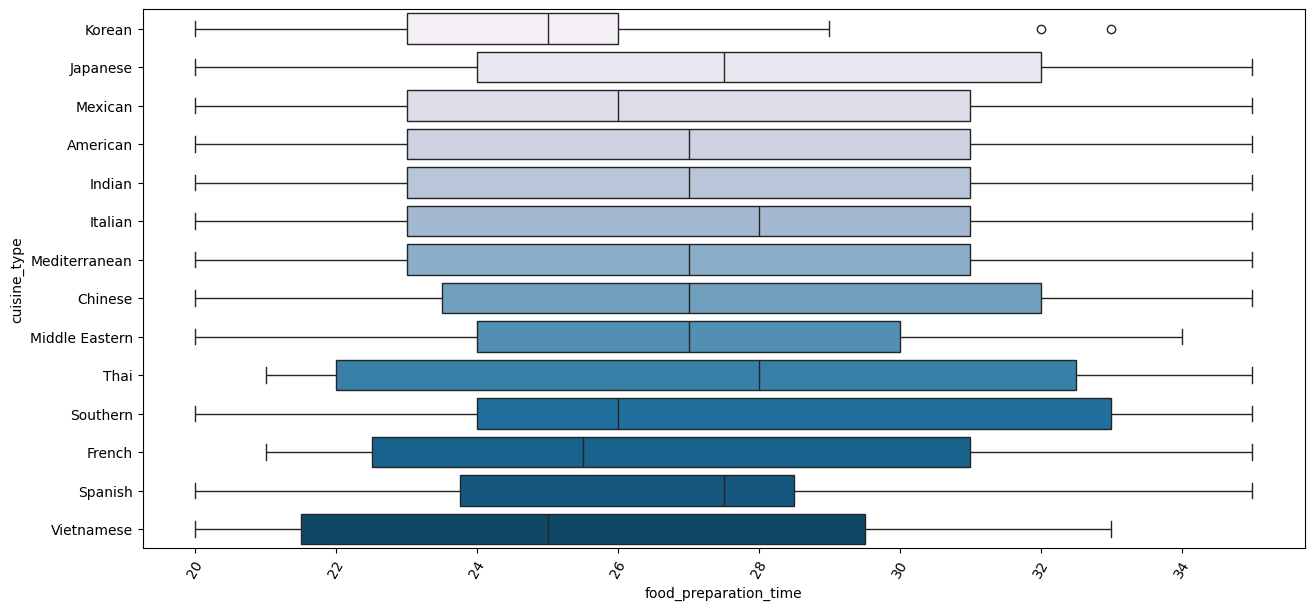

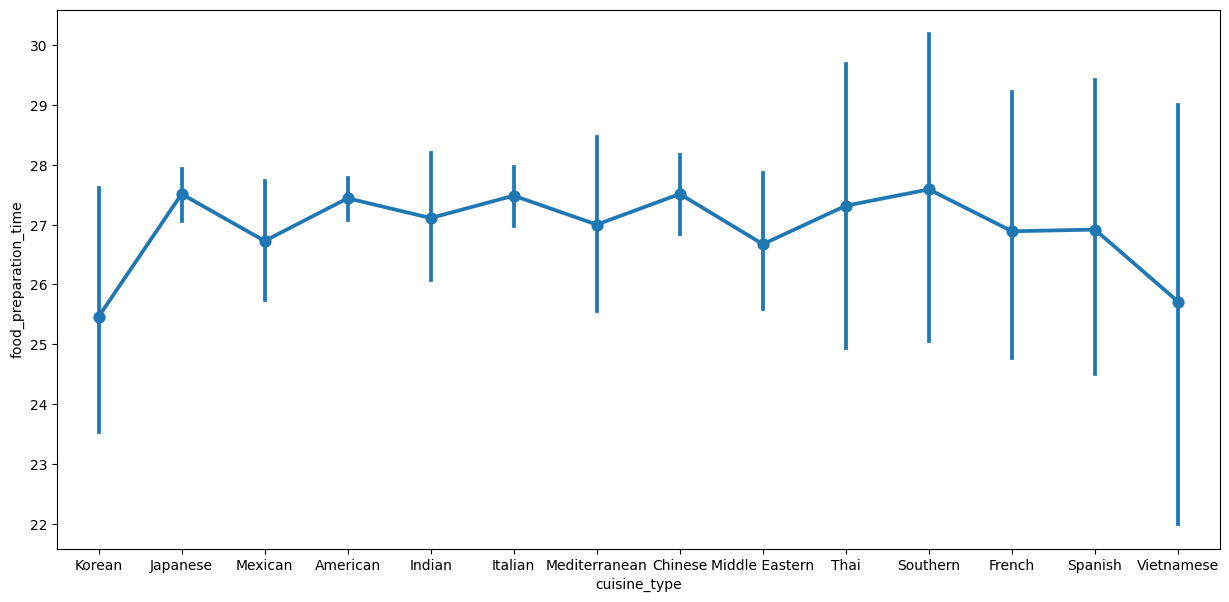

In [369]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "food_preparation_time", y = "cuisine_type", data = df, hue="cuisine_type", palette = 'PuBu', legend=False)
plt.xticks(rotation = 60)
plt.show()

plt.figure(figsize=(15, 7))
sns.pointplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)
plt.show()

#####Observations:
1. Southern cuisine type takes maximum time to cook.
2. Mean time to cook for America, Indian, Mediterranean,, Chinese and Middle Eastern is almost same.
3. Vietnamese cuisine type take minimum time to cook


\


#### Cuisine vs Cost of the order

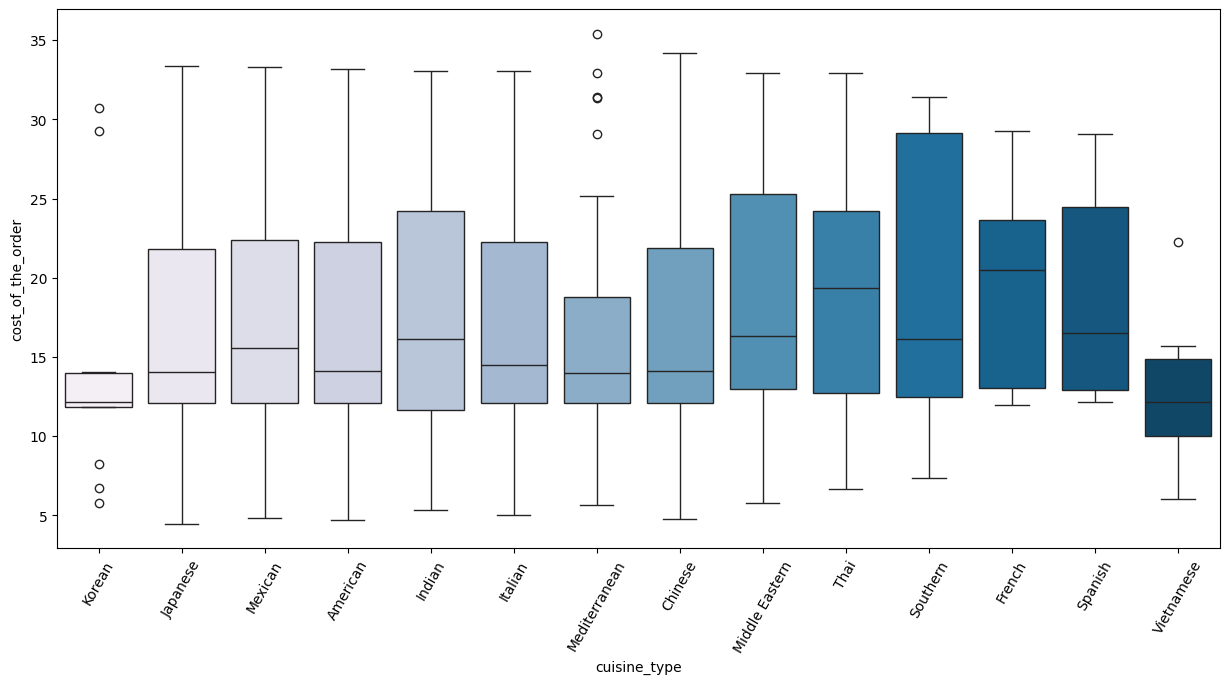

In [360]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, hue="cuisine_type",  palette = 'PuBu', legend=False)
plt.xticks(rotation = 60)
plt.show()

#####Observations:
1. Average cost of french cuisine is maximum.
2. Average cost of vietnamese cuisine in minimum.

\

#### Day of the Week vs Delivery time

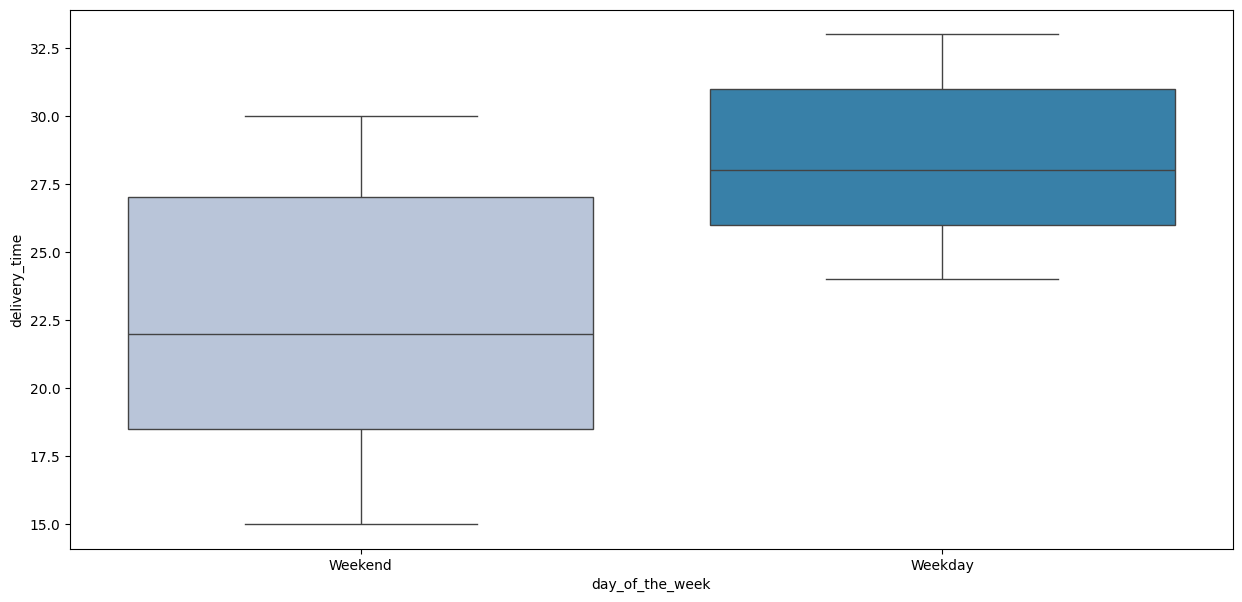

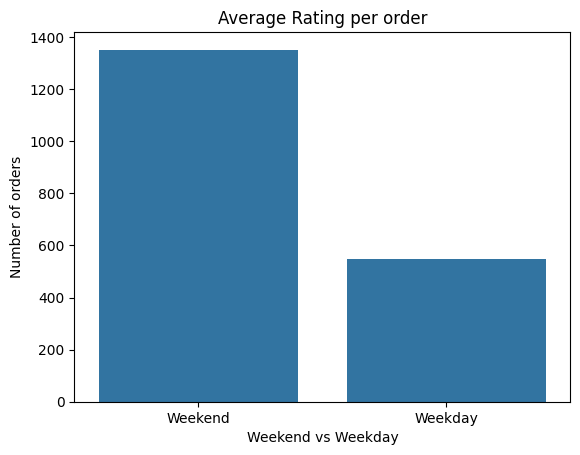

In [364]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, hue="day_of_the_week",  palette = 'PuBu', legend=False)
plt.show()

sns.countplot(data = df, x = 'day_of_the_week')
plt.xlabel('Weekend vs Weekday')
plt.ylabel('Number of orders')
plt.title('Average Rating per order')
plt.show()

#####Observations:
1. Though number of orders are more on weekend, delivery time is less. It means, there is a good possiblity that there are more people delivering the food over the weekend.
2. Even mean time to deliever food over the weekend is less than that of weekday.

#### Rating vs Delivery time

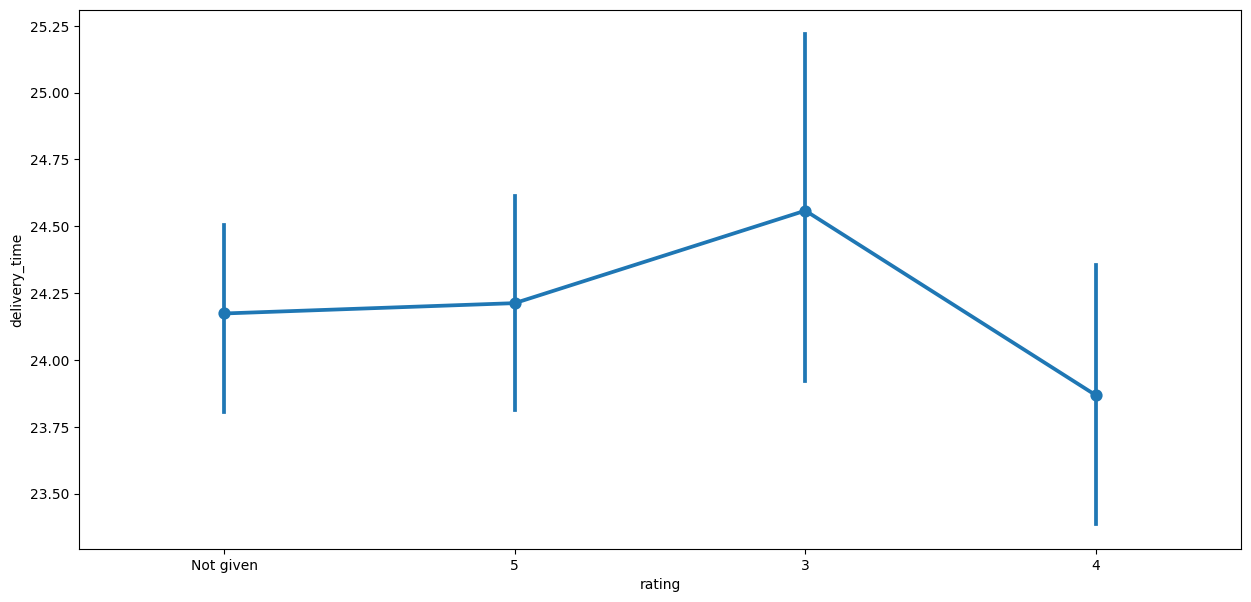

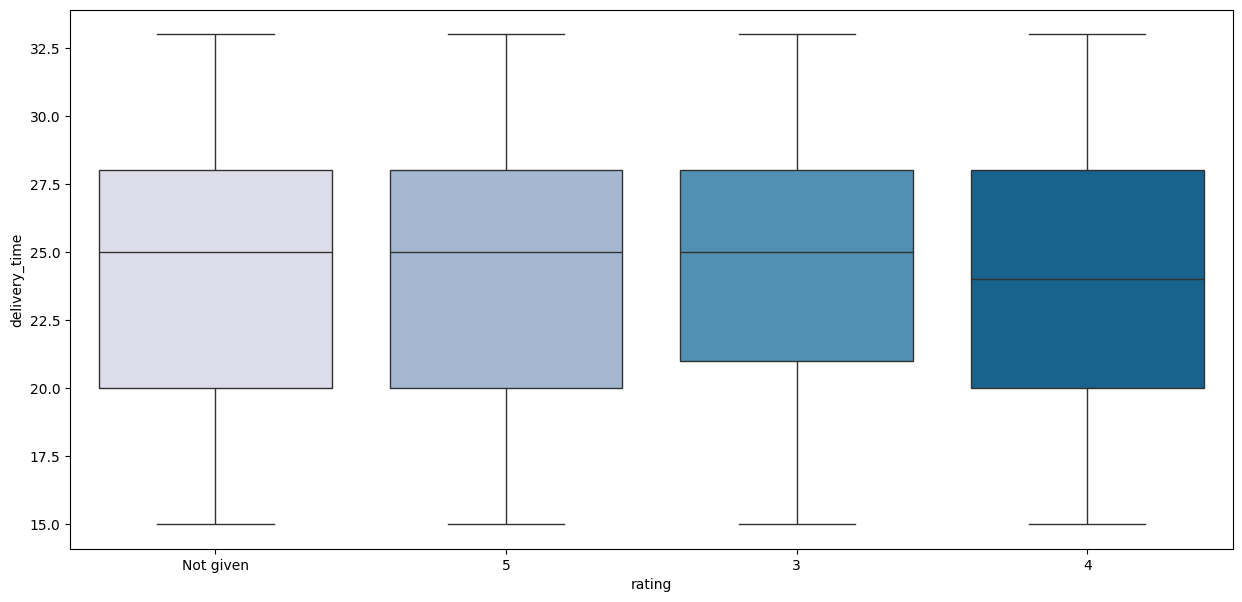

In [367]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(x = "rating", y = "delivery_time", data = df, hue="rating",  palette = 'PuBu', legend=False)
plt.show()

#####Observations:
From the data, it is clear that like delievery time and Rating are not releated.

\

#### Rating vs Food preparation time

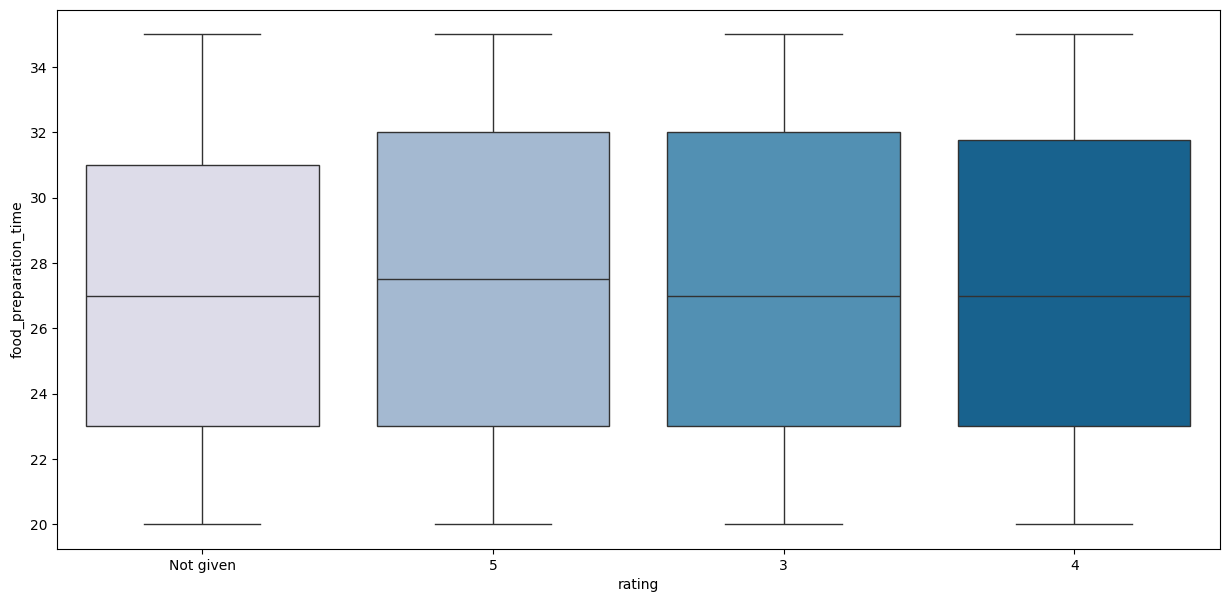

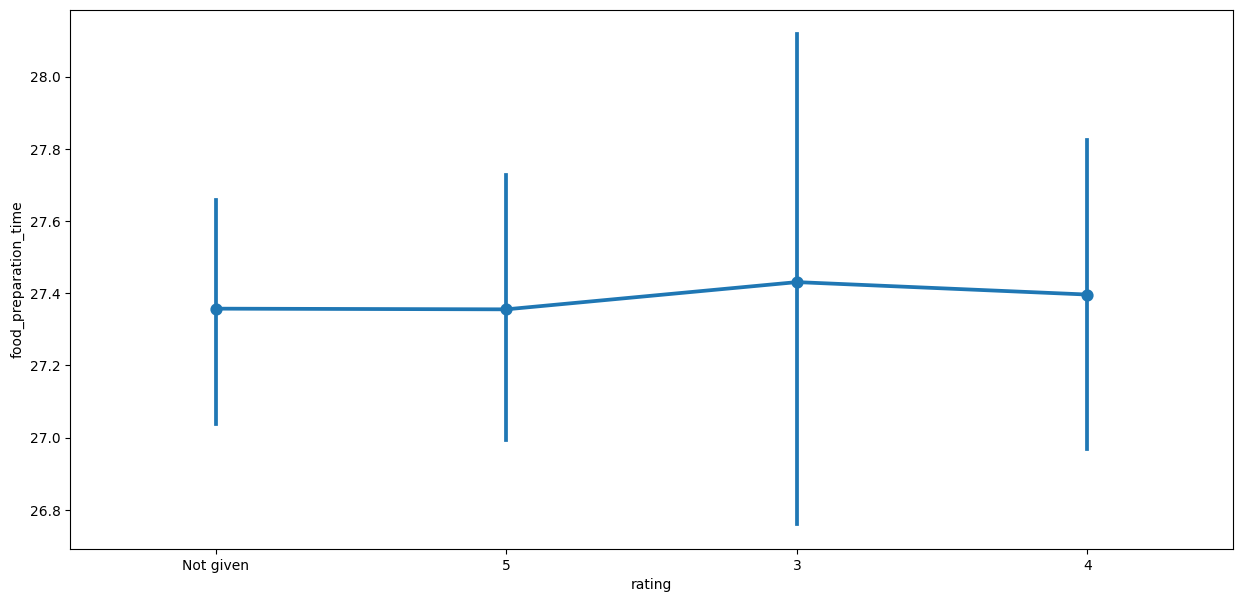

In [371]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "rating", y = "food_preparation_time", data = df, hue="rating",  palette = 'PuBu', legend=False)
plt.show()

plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#####Observations:
From the data, it is clear that like food preparation time and rating are not releated.

\

#### Rating vs Cost of the order

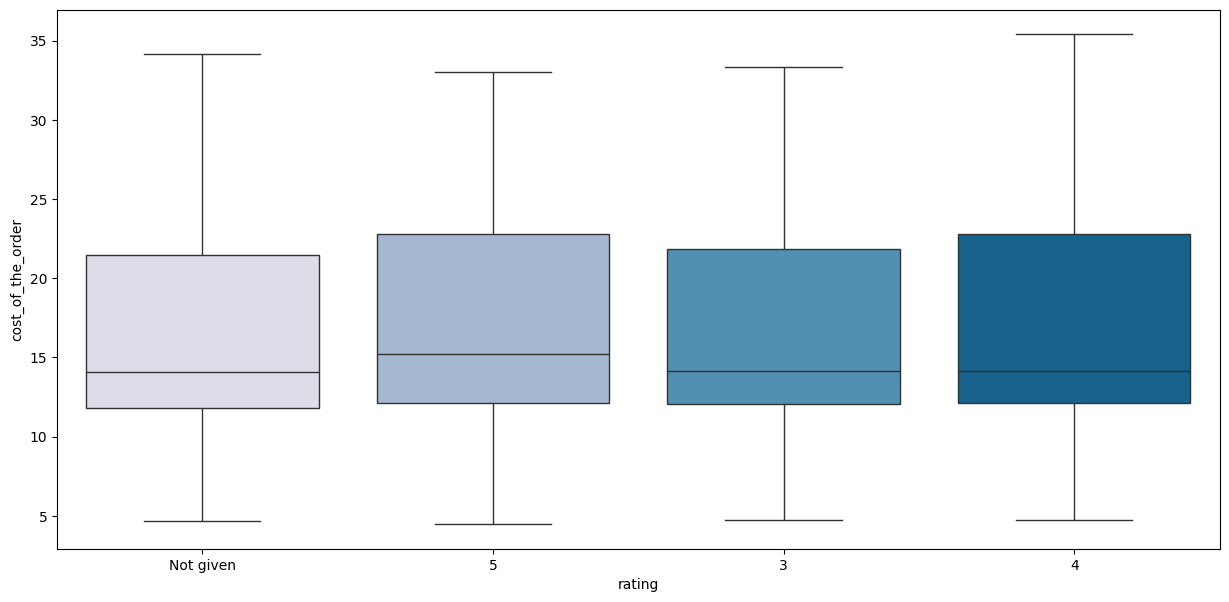

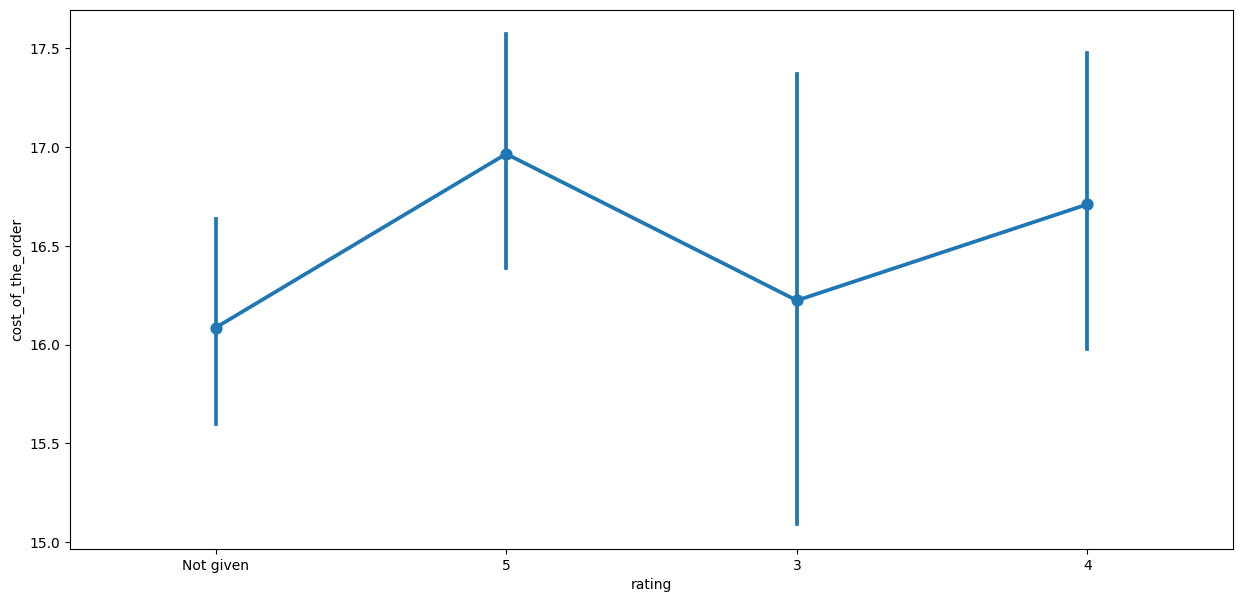

In [372]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "rating", y = "cost_of_the_order", data = df, hue="rating",  palette = 'PuBu', legend=False)
plt.show()

plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#####Observations:
From the data, relation between cost of the order and rating are not clear.

\

#### Correlation among variables


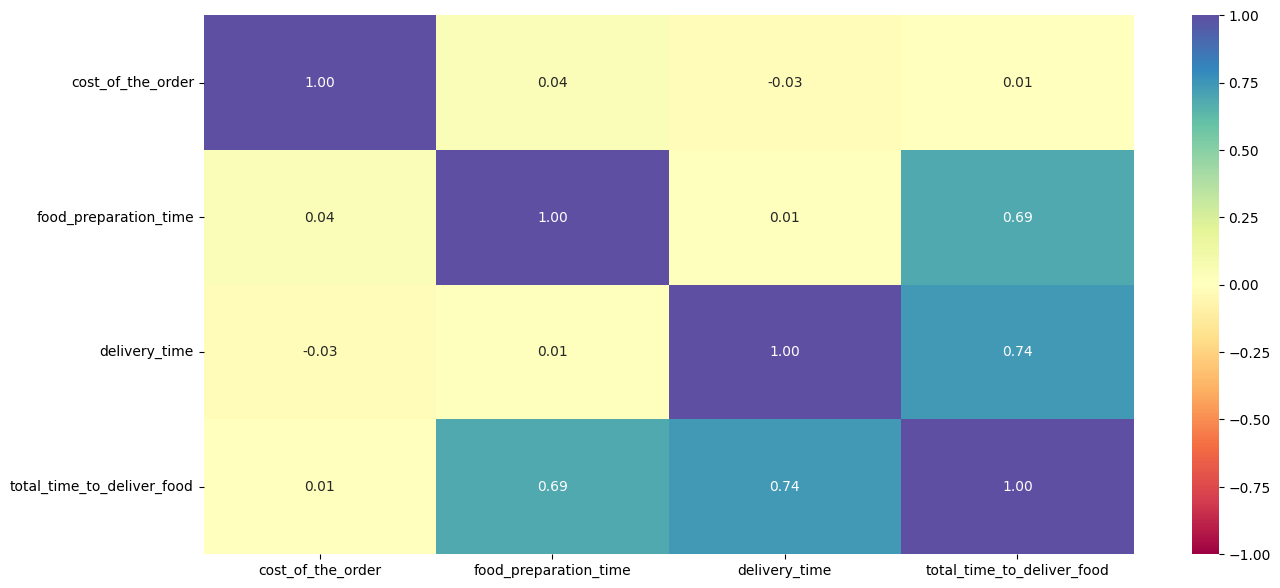

In [381]:
# Calculate total time to delievry food after order it
total_time_to_deliver_food = df['food_preparation_time'] + df['delivery_time']
df['total_time_to_deliver_food'] = total_time_to_deliver_food

# Calculate correlation matrix
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'total_time_to_deliver_food']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#####Observations:
1. There is no sigificant correlation in the time and cost of the order.
2. We can deduce that the maximum time goes in ddelievring the food, after it is order.

\

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [285]:
# Drop not rated resturants
rated_restaurants = df[df['rating'] != 'Not given'].copy()

# Convert rating column to int. This will make any non-interger value in rating as NaN
rated_restaurants['rating'] = pd.to_numeric(rated_restaurants['rating'], errors='coerce').dropna().astype(int)

# Calculate rating stats for returants, here count and average rating for each mentioned resturant
rated_restaurants_stats = rated_restaurants.groupby('restaurant_name').agg(rating_count=('rating', 'count'),average_rating=('rating', 'mean')).reset_index()

# Filter restaurants based on rating; count > 50 and average rating >4
df_eligible_restaurants = rated_restaurants_stats[(rated_restaurants_stats['rating_count'] > 50) & (rated_restaurants_stats['average_rating'] > 4)]
print(df_eligible_restaurants)

# Get and print the list of eligible restaurants
selected_resturants = df_eligible_restaurants['restaurant_name'].tolist()
print(f"\nRestaurants eligible for the promotional offer are: {', '.join(selected_resturants)}")


               restaurant_name  rating_count  average_rating
16   Blue Ribbon Fried Chicken            64        4.328125
17           Blue Ribbon Sushi            73        4.219178
117                Shake Shack           133        4.278195
132          The Meatball Shop            84        4.511905

Restaurants eligible for the promotional offer are: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop


#### Observations:
**Restaurants eligible for the promotional offer are:** **Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop**

---
\

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [284]:
# Function to determine revenue per order
def revenue_as_per_order_cost(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Calculate revenue per order
revenue_per_order = df['cost_of_the_order'].apply(revenue_as_per_order_cost)

# Calculate total revenue
# total_revenue = revenue_per_order.sum()
print(f"The net revenue of the  company is: ${revenue_per_order.sum():.2f}.")

The net revenue of the  company is: $6166.30.


#### Observations:
**The net revenue of the  company is: $6166.30.**

---
\

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [283]:
# Calculate total time to deliver food by adding time taken to prepare food and time take to deliver food after preparation.
total_time_to_deliver_food = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes to get delivered.
orders_greater_than_60_mins = total_time_to_deliver_food > 60

# Calculate the percentage of orders taking more than 60 minutes to get delivered.
percentage_orders_greater_than_60_mins = orders_greater_than_60_mins.mean() * 100
print(f"The percentage of orders taking more than 60 minutes to get delivered is {percentage_orders_greater_than_60_mins:.2f}%.")

The percentage of orders taking more than 60 minutes to get delivered is 10.54%.


#### Observations:
**The percentage of orders taking more than 60 minutes to get delivered is 10.54%.**

---
\

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [282]:
average_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
average_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(f"The average delivery time on weekdays is {average_delivery_time_weekday:.2f} minutes.")
print(f"The average delivery time on weekends is {average_delivery_time_weekend:.2f} minutes.")

average_delivery_time_diff = average_delivery_time_weekday - average_delivery_time_weekend

print(f"The difference in average delivery time between weekends and weekdays is {average_delivery_time_diff:.2f} minutes.")

The average delivery time on weekdays is 28.34 minutes.
The average delivery time on weekends is 22.47 minutes.
The difference in average delivery time between weekends and weekdays is 5.87 minutes.


#### Observations:
**The average delivery times on weekdays and weekends are 28.34 minutes and 22.47 minutes respectively.**
**And the average difference between the weekday and weekend delievery time is of 5.87 minutes.**

---
\

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Out of 1898, 736 orders are not rated.
*  American is most popular food.
*  More orders are the placed on weekend.
Average time to deliever food on weekend is less than that workweek.
*  There is no order with less than 3 rating.
*  Most popular resturant is Shake Shack
* There is no significant corelation between rating, cost of the order and delieveryt time.


### Recommendations:

*  Remind customer at least once to rate the order. As this not rated number is big, it may be a good idea to offer some dicount on next order after providing rating.
*  As American is most popular food, it may be good idea to coloborate with more American resturants.
*  It may be a good idea to have more deliveryman over the weekend compared to weekday.  